In [1]:
import numpy as np
import pickle
import torch as th
import matplotlib.pyplot as plt
import polarTransform

from train_util import val_dataloader_setup

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


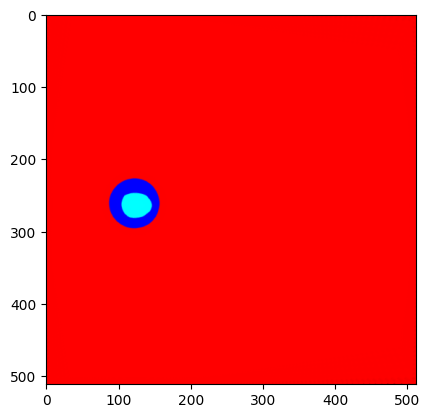

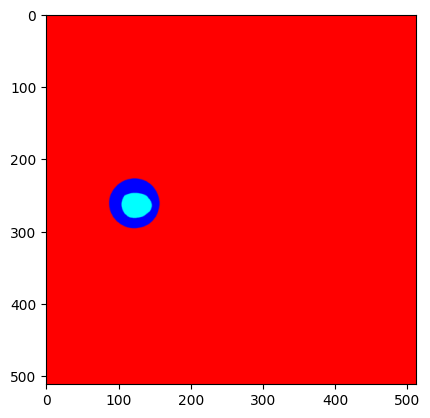

In [11]:
val_dataloader, polar_val_dataloader, names = val_dataloader_setup()

for j, (og_batch, polar_batch) in enumerate(zip(val_dataloader, polar_val_dataloader)):
    with open("data_polar/REFUGE2/Validation/settings.pickle", "rb") as handle:
        settings_dict = pickle.load(handle)
    
    og_image, og_labels = og_batch[0], og_batch[1]
    polar_image, polar_labels = polar_batch[0], polar_batch[1]
    
    polar_labels = polar_labels.numpy()[0]
    
    output_cartesian = settings_dict[names[j]].convertToCartesianImage(np.transpose(polar_labels, (2, 1, 0)))
    plt.imshow(output_cartesian)
    plt.show()
    plt.imshow(og_labels[0].permute(1, 2, 0))
    plt.show()
    break